Problem4

<b>Introduction</b><br>
This task gives an idea on how to work with pandas Data Frames.The presented analysis focuses on hourly meteorological data from three major airports in New York—LGA, JFK, and EWR—throughout the year 2013. The primary goal is to manipulate and analyze the data with jupyter notebook, addressing specific tasks. The initial steps involve converting temperature, precipitation, visibility, and wind-related measurements to metric units. Subsequently, daily mean wind speeds for LGA are computed, and the results are visualized. The final steps include identifying and handling outliers in the dataset and plotting monthly mean wind speeds for all three airports on a single graph.

In [33]:
import pandas as pd #importing the libraries
import matplotlib.pyplot as plt
import numpy as np


Let's load the dataset into pandas dataframe

In [15]:
df = pd.read_csv("nycflights13_weather.csv-1.gz",comment='#') #Loading
df #displaying

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26125,LGA,2013,12,30,19,35.96,19.94,51.78,340.0,13.80936,15.891535,0.0,1017.1,10.0,2013-12-30 20:00:00
26126,LGA,2013,12,30,20,33.98,17.06,49.51,330.0,17.26170,19.864419,0.0,1018.8,10.0,2013-12-30 21:00:00
26127,LGA,2013,12,30,21,32.00,15.08,49.19,340.0,14.96014,17.215830,0.0,1019.5,10.0,2013-12-30 22:00:00
26128,LGA,2013,12,30,22,30.92,12.92,46.74,320.0,17.26170,19.864419,0.0,1019.9,10.0,2013-12-30 23:00:00


1. Lets convert our data values to International System of Units, such as temp and dewp to Celcisu rather than Fahreheit

In [16]:
#Each column is manually converted based on their equations

df['temp'] = (df['temp'] - 32) * 5/9  # Fahrenheit to Celsius
df['dewp'] = (df['dewp'] - 32) * 5/9  # Fahrenheit to Celsius
df['precip'] *= 25.4  # Inches to millimeters
df['visib'] *= 1.60934  # Miles to kilometers
df['wind_speed'] *= 0.44704  # mph to m/s
df['wind_gust'] *= 0.44704  # mph to m/s

Successfully converted and replaced the data on existing column.

2. Tried to compute daily mean wind speed of LGA airport

In [28]:
#It is mentioned that the dataset is having bug that 'time-hour' column is incorrectly shifted by 1 hour.
#Need to reduce/correct it

df['time_hour'] = pd.to_datetime(df['time_hour']) - pd.Timedelta(hours=1)


Converted the column and fixed the bug

In [31]:
# Need to group by year, month, and day, then compute the mean wind speed of each day of LGA airport
daily_mean_wind_speeds = df[df['origin'] == 'LGA'].groupby(['year', 'month', 'day'])['wind_speed'].mean().reset_index()
daily_mean_wind_speeds.head()

,year,month,day,wind_speed
0,2013,1,1,6.687781
1,2013,1,2,6.430559
2,2013,1,3,4.908660
3,2013,1,4,6.880698
4,2013,1,5,5.144447


Successfully created a new dataframe where mean windspeed of each day from LGA airport is stored

<br>
3. Now we need to plot this data.

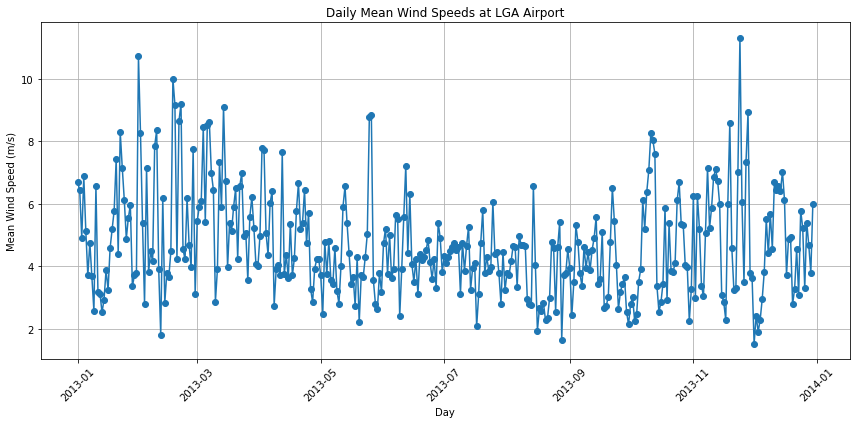

In [39]:
# Creating a new column with human-readable date
daily_mean_wind_speeds['date'] = pd.to_datetime(daily_mean_wind_speeds[['year', 'month', 'day']])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_mean_wind_speeds['date'], daily_mean_wind_speeds['wind_speed'], marker='o', linestyle='-')
plt.title('Daily Mean Wind Speeds at LGA Airport')
plt.xlabel('Day')
plt.ylabel('Mean Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

Successfully plotted the mean windspeed of LGA airport based on the date.

<br><br>
4. Need to identify the ten windiest days at LGA airport.

In [52]:
# To identify the ten windiest days we just need to sort the daily mean wind speeds in descending order
top_10_windiest_days = daily_mean_wind_speeds.sort_values(by='wind_speed', ascending=False).head(10)

# Displaying the result
print(top_10_windiest_days[['wind_speed', 'date']])

     wind_speed       date
327   11.317783 2013-11-24
30    10.717598 2013-01-31
47    10.010236 2013-02-17
51     9.192903 2013-02-21
48     9.174264 2013-02-18
72     9.109958 2013-03-14
331    8.938477 2013-11-28
145    8.852736 2013-05-26
144    8.766995 2013-05-25
50     8.659819 2013-02-20


Top 10 windiest days has been found, we just needed to sort our already created dataframe.

5. Impute outlier in wind speed column with NaN and compute the mean wind speed of all three airport

In [58]:
# Let's identify and replace the outlier with np.nan
# Here we are considering outlier as the maximum value.
index_outlier = df['wind_speed'].idxmax()  # Finding the index of the maximum wind speed
df.at[index_outlier, 'wind_speed'] = np.nan  # Replace with that index value with NaN

# Now we can compute the monthly mean wind speeds for all three airports
monthly_mean_wind_speeds = df.groupby(['year', 'month', 'origin'])['wind_speed'].mean().reset_index()

# Displaying the result
print(monthly_mean_wind_speeds.head(10))

   year  month origin  wind_speed
0  2013      1    EWR    4.309688
1  2013      1    JFK    5.360070
2  2013      1    LGA    5.068977
3  2013      2    EWR    4.731659
4  2013      2    JFK    5.954831
5  2013      2    LGA    5.522218
6  2013      3    EWR    5.144447
7  2013      3    JFK    6.209389
8  2013      3    LGA    5.848862
9  2013      4    EWR    4.265604


Here we have replaced the outlier with NaN and found the mean wind speed for all airports. Since outlier is removed the mean will be different.

<br><br>
6. Lets plot this data on a graph

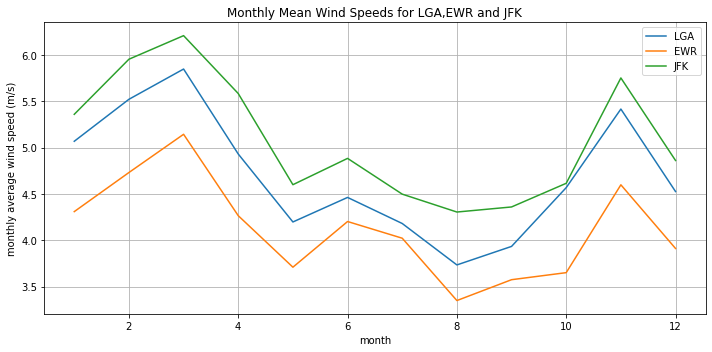

In [64]:
# Pivot table makes it easier to organize data and it is helpfull to plot.
monthly_mean_wind_speeds_pivot = monthly_mean_wind_speeds.pivot(index='month', columns='origin', values='wind_speed')

# Plotting a line graph
plt.figure(figsize=(10,5))
for origin in ['LGA', 'EWR', 'JFK']: # Using a loop to iterate over three airports
    plt.plot(monthly_mean_wind_speeds_pivot.index, monthly_mean_wind_speeds_pivot[origin], label=origin)

plt.title('Monthly Mean Wind Speeds for LGA,EWR and JFK')
plt.xlabel('month')
plt.ylabel('monthly average wind speed (m/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

PLotted the monthly average wind speed on line graph.